**2. Exploratory Analysis**

**Load the data**

Dataset reference - Big Tech Companies - Tweet Sentiment https://www.kaggle.com/datasets/wjia26/big-tech-companies-tweet-sentiment

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'tech_tweets.csv'
tweets_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure and contents
tweets_df.head()


,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1
0,10/5/2020 8:44,Nvidia,41,410,Nvidia,sydney,0,jyolyu,#Nvidia,#NVIDIA #GauGAN is actually a good tool to pra...,1.313040e+18,N0%Ice,0.4404,Technology,Nvidia
1,10/5/2020 8:44,Nvidia,367,267,Nvidia,PARIS,0,MiClaverie,#Nvidia,"#BullSequana X2415, the first #supercomputer b...",1.313040e+18,MichÃ¨le Claverie,0.0000,Technology,Nvidia
2,10/5/2020 8:41,Nvidia,14,104,Nvidia,Japan,0,_stingraze,#Nvidia,I'm going to attend GTC 2020 tonight! Excited....,1.313040e+18,Tsubasa Kato,0.4003,Technology,Nvidia
3,10/5/2020 8:28,Nvidia,18286,941,Nvidia,NaN,0,gamingonlinux,#Nvidia,#NVIDIA delays launch of #GeForce RTX 3070 unt...,1.313030e+18,GamingOnLinux ðŸ§,0.0000,Technology,Nvidia
4,10/5/2020 8:18,Nvidia,42,84,Nvidia,"Paris, France",0,anupdshetty,#Nvidia,"#BullSequana X2415, the first #supercomputer b...",1.313030e+18,Anup Shetty,0.0000,Technology,Nvidia


**Basic Statistical Analysis**

In [ ]:
# Summary statistics for numerical variables
numerical_summary = tweets_df.describe()

# Proportion of missing values for each column
missing_values = tweets_df.isnull().mean() * 100

# Examining the distribution of categorical variables
categorical_columns = ['file_name', 'group_name', 'location', 'search_query', 'partition_0', 'partition_1']
categorical_summary = tweets_df[categorical_columns].describe()

numerical_summary, missing_values, categorical_summary

(          followers       friends  retweet_count    twitter_id      polarity
 count  1.432300e+04  1.432300e+04   14323.000000  1.432300e+04  14323.000000
 mean   1.137609e+04  3.421877e+03       0.732109  1.311577e+18      0.177893
 std    1.212538e+05  1.569047e+04       4.487186  2.655794e+15      0.376158
 min    0.000000e+00  0.000000e+00       0.000000  1.307470e+18     -0.971100
 25%    7.100000e+01  9.750000e+01       0.000000  1.308850e+18      0.000000
 50%    4.870000e+02  4.720000e+02       0.000000  1.310910e+18      0.000000
 75%    3.515000e+03  2.289000e+03       1.000000  1.313870e+18      0.458800
 max    9.756922e+06  1.162364e+06     333.000000  1.315730e+18      0.987900,
 created_at        0.000000
 file_name         0.000000
 followers         0.000000
 friends           0.000000
 group_name        0.000000
 location         23.612372
 retweet_count     0.000000
 screenname        0.000000
 search_query      0.000000
 text              0.000000
 twitter_id      

**Clean the text data using regular expressions**

In [ ]:
import re

# Function to clean the text data using regular expressions
def clean_text_alternative(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\S+", "", text)  # Remove user handles
    text = re.sub(r"#\S+", "", text)  # Remove hashtags
    text = re.sub(r"[^0-9a-zA-Z]+", " ", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text)  # Remove multiple spaces
    return text.strip()

# Apply the cleaning function to the text column
tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_text_alternative)

# Display the cleaned text along with the original text for comparison
tweets_df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,#NVIDIA #GauGAN is actually a good tool to pra...,is actually a good tool to practice compositio...
1,"#BullSequana X2415, the first #supercomputer b...",X2415 the first blade server in Europe to inte...
2,I'm going to attend GTC 2020 tonight! Excited....,I m going to attend GTC 2020 tonight Excited
3,#NVIDIA delays launch of #GeForce RTX 3070 unt...,delays launch of RTX 3070 until end of October
4,"#BullSequana X2415, the first #supercomputer b...",X2415 the first blade server in Europe to inte...


**Visualization**

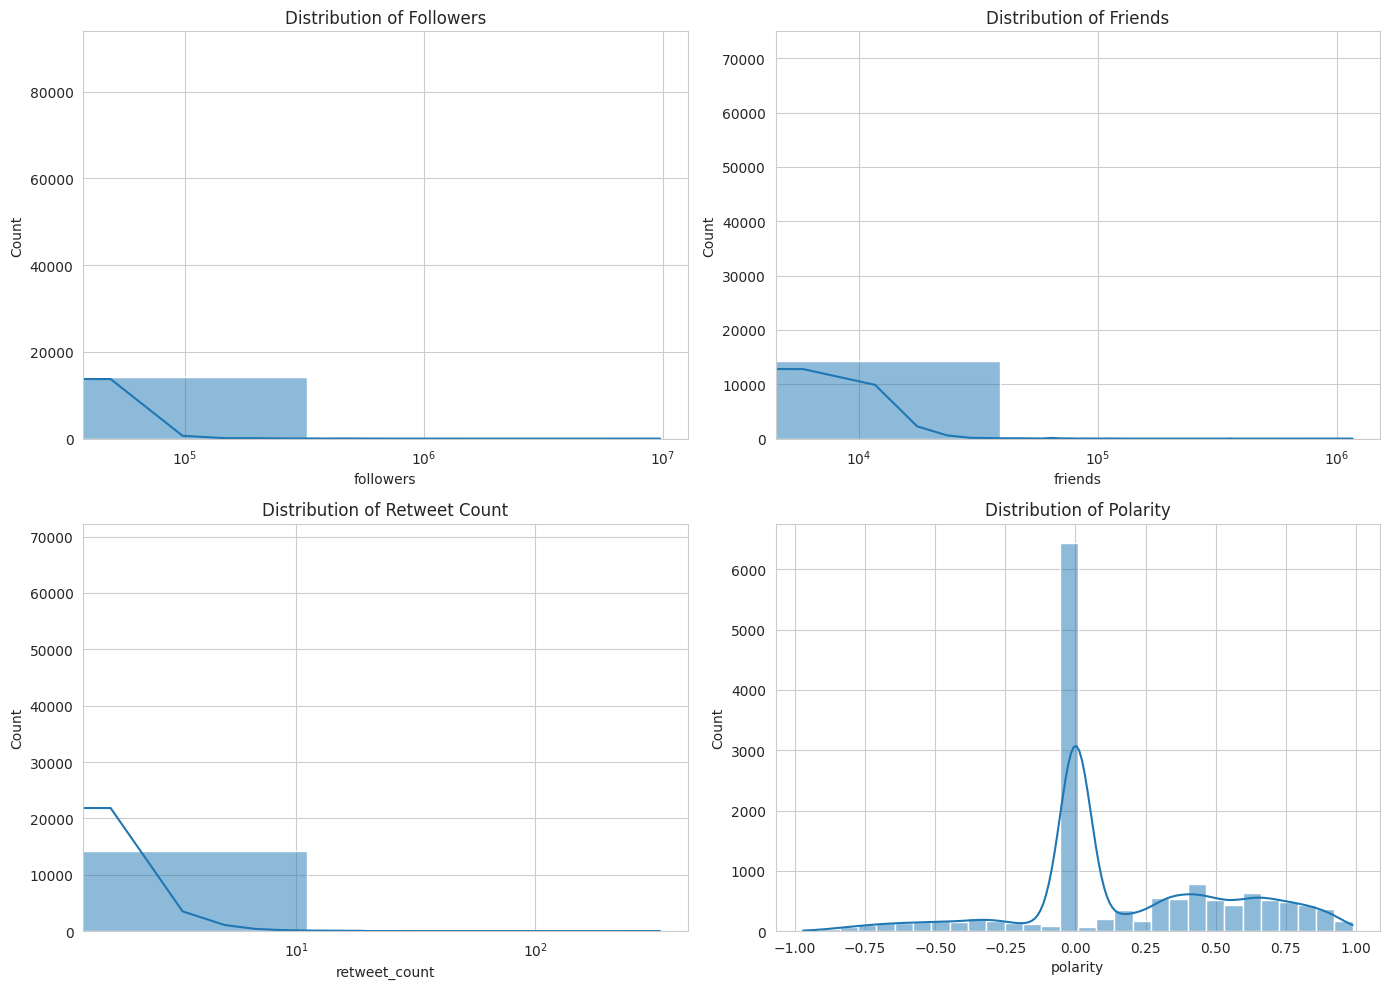

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating subplots for the numerical fields
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting distributions
sns.histplot(tweets_df['followers'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Followers')
axes[0, 0].set_xscale('log')  # Using log scale due to wide range of values

sns.histplot(tweets_df['friends'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Friends')
axes[0, 1].set_xscale('log')  # Using log scale due to wide range of values

sns.histplot(tweets_df['retweet_count'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of Retweet Count')
axes[1, 0].set_xscale('log')  # Using log scale due to wide range of values

sns.histplot(tweets_df['polarity'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribution of Polarity')

plt.tight_layout()
plt.show()

**WordCloud**

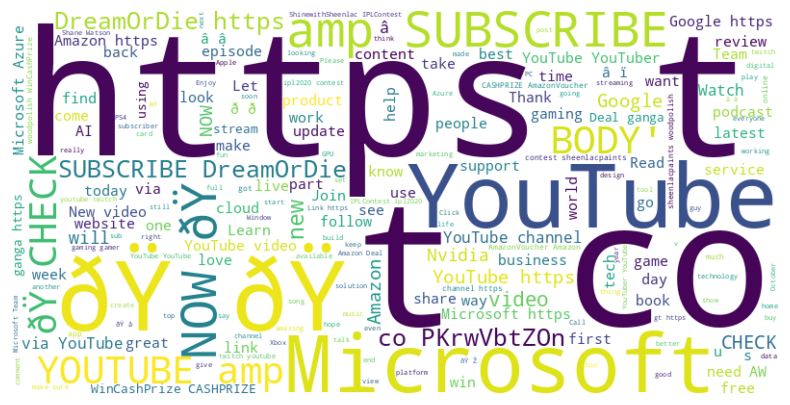

In [ ]:
from wordcloud import WordCloud

# Joining all the text in the tweets
all_text = " ".join(tweet for tweet in tweets_df.text)

# Creating a word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(all_text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Top 20 Most Common Words in Tweets**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


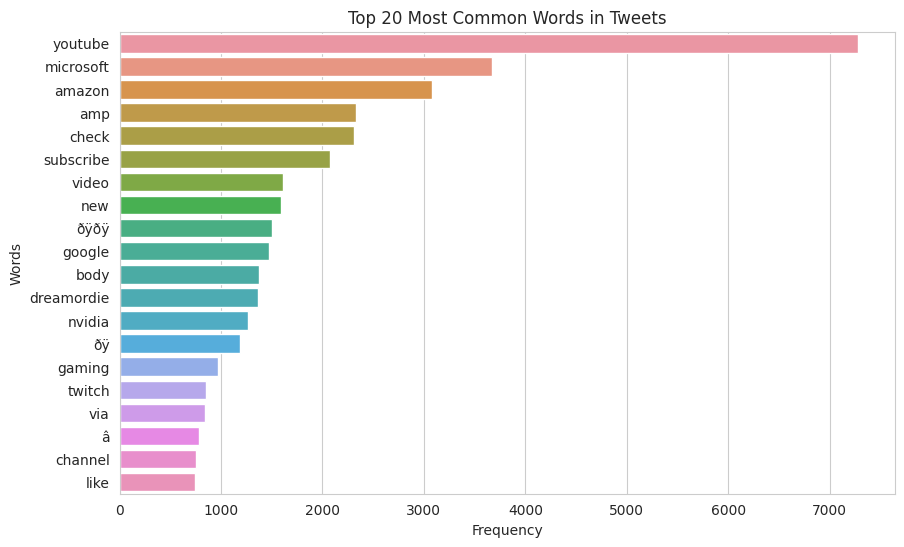

In [ ]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Downloading the stopwords from NLTK
nltk.download('stopwords')

# Function to clean and extract words from text
def clean_and_extract_words(text):
    # Remove URLs, hashtags, mentions, special characters, and numbers
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Converting to lower case and splitting
    words = text.lower().split()

    # Removing stopwords
    words = [word for word in words if word not in stopwords.words('english')]

    return words

# Extracting words from each tweet and flattening the list
all_words = [word for tweet in tweets_df.text for word in clean_and_extract_words(tweet)]

# Counting the occurrences of each word
word_counts = Counter(all_words)

# Getting the most common words
most_common_words = word_counts.most_common(20)

# Plotting the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in most_common_words], y=[word[0] for word in most_common_words])
plt.title('Top 20 Most Common Words in Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


**Most Common Hashtags**

In [ ]:
# Function to extract hashtags from text
def extract_hashtags(text):
    # Extracting all words that start with '#'
    return [part[1:] for part in text.split() if part.startswith('#')]

# Applying the function to each tweet
hashtags = [hashtag for tweet in tweets_df['text'] for hashtag in extract_hashtags(tweet)]

# Counting the occurrences of each hashtag
hashtag_counts = Counter(hashtags)

# Getting the 20 most common hashtags
most_common_hashtags = hashtag_counts.most_common(20)

most_common_hashtags


[('YouTube', 2296),
 ('youtube', 2098),
 ('Microsoft', 2052),
 ('Amazon', 1722),
 ('YOUTUBE', 1381),
 ('DreamOrDie', 1362),
 ('amazon', 838),
 ('microsoft', 802),
 ('Google', 790),
 ('gaming', 675),
 ('twitch', 621),
 ('Youtube', 555),
 ('Nvidia', 427),
 ('nvidia', 347),
 ('google', 316),
 ('gamer', 309),
 ('music', 293),
 ('AWS', 285),
 ('YouTuber', 270),
 ('Deals', 251)]